In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, datasets, model_selection

In [2]:
mnist = datasets.load_digits()

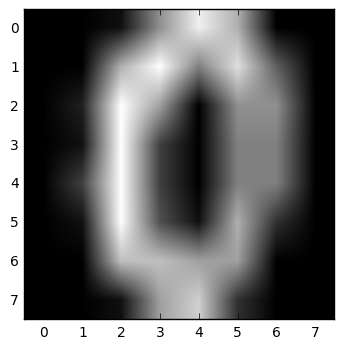

In [4]:
plt.imshow(mnist['images'][10], cmap='gray')

In [6]:
X = mnist['images']
y = mnist['target']
X.shape

(1797, 8, 8)

In [8]:
X = X.reshape((1797,64,))

In [10]:
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size=0.25)
X_train.shape

(1347, 64)

In [11]:
clf = linear_model.LogisticRegression()

In [12]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
clf.score(X_train, y_train)

0.99406087602078697

In [14]:
clf.score(X_test, y_test)

0.95111111111111113

In [16]:
y_pred = clf.predict(X_test)

In [17]:
np.where(y_test != y_pred)

(array([ 18,  24,  35,  39,  50,  62,  94, 101, 145, 190, 208, 221, 228,
        239, 259, 262, 289, 299, 302, 319, 417, 421]),)

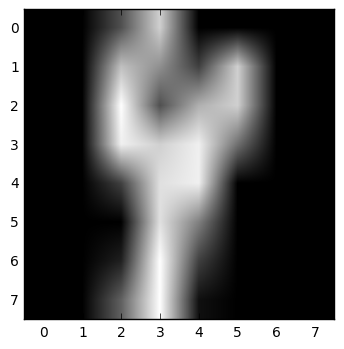

In [32]:
plt.imshow(X_test[35].reshape((8,8)), cmap='gray')

In [22]:
print(y_pred[35])
print(y_test[35])
prob = clf.predict_proba(X_test)

8
1


In [27]:
C_test = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [31]:
for C in C_test:
    clf = linear_model.LogisticRegression(C=C)
    clf.fit(X_train, y_train)
    print("score: {0}, C value: {1}".format(clf.score(X_test, y_test), C))

score: 0.8755555555555555, C value: 1e-05
score: 0.9244444444444444, C value: 0.0001
score: 0.9466666666666667, C value: 0.001
score: 0.96, C value: 0.01
score: 0.96, C value: 0.1
score: 0.9511111111111111, C value: 1
score: 0.9511111111111111, C value: 10
score: 0.9488888888888889, C value: 100
score: 0.9377777777777778, C value: 1000
